## Mallet-TM : 
### Extract Topic Model with LdaMallet from KCC News and CIS test data

In [1]:
# -*- coding: utf-8 -*-
"""
Input: "KCC Data/CkipNewsCisTest-KccDict2020.txt"
Output: "KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt"

@author: johnson
"""
from gensim import corpora, models, utils
from gensim.models import LdaModel
from gensim.models import CoherenceModel

### read data from txt file, and tokenize words, clean-up text

In [2]:
fList = []
with open("KCC Data/CkipNewsCisTest-KccDict2020.txt","r", encoding='utf-8-sig') as files:
     for file in files:
        #simple_preprocess: tokenize,去除標點 - gensim.utils.simple_preprocess(doc, deacc=False, min_len=2, max_len=15)
        fList.append(list(utils.simple_preprocess(file, deacc=True, min_len=2,)))
print("fList[:1] = ", fList[:1])
print("------------------------------")

fList[:1] =  [['馬英九', '昨天', '上午', '視察', '衛武營藝術文化中心', '文化部', '洪孟啟', '工程', '副主委', '顏久榮', '高雄市', '副市長', '吳宏謀', '一同', '到場', '聽取', '衛武營', '興建', '工程', '簡報', '瞭解', '工程進度', '執行', '情形', '完成', '百分之九十五', '工程進度', '共計', '投入', '新臺幣', '一百零五億八千萬', '經費', '預計', '六月', '竣工', '明年', '開館', '營運', '目標', '馬英九', '指出', '衛武營', '案子', '九十四年', '編列', '預算', '核定', '施工', '正式', '完工', '時間', '長達', '十三', '原先', '預計', '故宮', '南院', '工程', '單位', '部門', '克服', '困難', '值得', '檢討', '總統', '致詞', '民國', '九十九年', '主持', '動土', '典禮', '原從', '黃土', '生長出', '有如', '魟魚', '悠遊', '海浪', '建築', '實在', '驚豔', '過程', '包含', '團隊', '付出', '努力', '籌建', '過程', '艱辛', '各界', '關注', '投入', '新建', '工程', '幾近', '完工', '特別', '肯定', '文化部', '籌建', '過程', '付出', '辛勞', '高雄市政府', '各界', '支持', '配合', '總統', '文化', '城市', '期許', '衛武營藝術文化中心', '臺灣', '藝術', '力量', '南方', '集結地', '臺北', '國家兩廳院', '臺中', '國家歌劇院', '攜手', '並進', '打造', '台灣', '國際', '藝文', '版圖', '地標', '文化部', '洪孟啟', '衛武營', '考驗', '面臨', '營運', '壓力', '文化部', '衛武營', '南部', '高雄市文化中心', '嘉義', '文化', '園區', '故宮', '南院', '台南', '地方', '藝文', '團體', '高雄大東文化藝術中心', '屏東', '演藝廳'

### creat dictionary for corpus

In [3]:
# creat a unique id for each word segment
dict = corpora.Dictionary(list(fList))
print("dict = ", dict)
print("------------------------------")

dict =  Dictionary(1528 unique tokens: ['一同', '一百零五億八千萬', '上午', '並進', '主持']...)
------------------------------


### creat corpus need for Topic Modeling

In [4]:
# creat mapping matrix of [word_id, word_frequency] for each word segment
corpus = [dict.doc2bow(text) for text in fList]   
print("corpus[:1] = ", corpus[:1])  
print("================================================")

print("print lists of [word:frequency]")
[[print((dict[id], freq)) for id,freq in cp] for cp in corpus[:1]]
print("======================================================")

corpus[:1] =  [[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 2), (24, 1), (25, 1), (26, 1), (27, 3), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 3), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 4), (52, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 2), (69, 4), (70, 5), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1), (101, 2), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109

### building the Topic Model from MALLET
#### enviroment setting for Mallet LDA: https://programminghistorian.org/en/lessons/topic-modeling-and-mallet#installing-mallet

In [5]:
mallet_path = "C://mallet/bin/mallet"
ldamal = models.wrappers.LdaMallet(mallet_path, corpus=corpus, id2word=dict, num_topics=20)
output = open("KCC Data/NewsCisTest-KccDict2020-MalletNum20.txt", 'w', encoding='utf-8-sig')

#print(ldamal.show_topics(formatted=False))
# 列出最重要的前若干个主题
lsTM = ldamal.show_topics(num_topics=20, num_words=20, log=False, formatted=False)
for tupleTM in lsTM:
        str1 = "".join(str(x) for x in tupleTM)
        #print("type(str1) = ", type(str1))
        str1 += "\n"
        print("strTM = ", str1)
        output.write(str1)
output.close()
 
#  print("------------------------------")
#  print("Perplexity = ", ldamal.log_perplexity(corpus))

print("------------------------------")
cm = models.CoherenceModel(model=ldamal, texts=list(fList), dictionary= dict, coherence= 'c_v')
coher_lda = cm.get_coherence()
print("\n Coherence Score: ", coher_lda)


strTM =  0[('衛武營', 0.05303030303030303), ('工程', 0.045454545454545456), ('文化', 0.03787878787878788), ('文化部', 0.03787878787878788), ('國際', 0.03787878787878788), ('過程', 0.030303030303030304), ('付出', 0.022727272727272728), ('總統', 0.022727272727272728), ('投入', 0.015151515151515152), ('南院', 0.015151515151515152), ('洪孟啟', 0.015151515151515152), ('籌建', 0.015151515151515152), ('市長選舉', 0.015151515151515152), ('預計', 0.015151515151515152), ('完工', 0.015151515151515152), ('工程進度', 0.015151515151515152), ('故宮', 0.015151515151515152), ('指出', 0.015151515151515152), ('營運', 0.015151515151515152), ('高雄市文化中心', 0.015151515151515152)]

strTM =  1[('高雄', 0.26573426573426573), ('陳菊', 0.11188811188811189), ('台灣', 0.055944055944055944), ('競爭', 0.03496503496503497), ('高雄市', 0.03496503496503497), ('合作', 0.027972027972027972), ('資源', 0.02097902097902098), ('好評', 0.02097902097902098), ('早期', 0.013986013986013986), ('尋求', 0.013986013986013986), ('歷史', 0.013986013986013986), ('領域', 0.006993006993006993), ('一家人', 0.0069


 Coherence Score:  0.6314950622639735


### Finding the optimal number of topics

In [6]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    # global mallet_path, dict
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=dict)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
        coher = coherencemodel.get_coherence()
        print("Num_topics: ", num_topics, " Coherence Score= ", coher)
    return model_list, coherence_values

In [7]:
model_list, coherence_values = compute_coherence_values(dictionary=dict, corpus=corpus, texts=list(fList), limit=100, start=5, step=5)

Num_topics:  5  Coherence Score=  0.3278931002700439
Num_topics:  10  Coherence Score=  0.48467669036568245
Num_topics:  15  Coherence Score=  0.6175988943825547
Num_topics:  20  Coherence Score=  0.6365768590647962
Num_topics:  25  Coherence Score=  0.6190705616947657
Num_topics:  30  Coherence Score=  0.6004773398863381
Num_topics:  35  Coherence Score=  0.6122513056632213
Num_topics:  40  Coherence Score=  0.5963572342356765
Num_topics:  45  Coherence Score=  0.6090844804109194
Num_topics:  50  Coherence Score=  0.6064857524463625
Num_topics:  55  Coherence Score=  0.5924085323161273
Num_topics:  60  Coherence Score=  0.6171981619497593
Num_topics:  65  Coherence Score=  0.5801017248491825
Num_topics:  70  Coherence Score=  0.5833629419779508
Num_topics:  75  Coherence Score=  0.573088777617634
Num_topics:  80  Coherence Score=  0.5923383303164298
Num_topics:  85  Coherence Score=  0.5742742643865016
Num_topics:  90  Coherence Score=  0.5890426451016157
Num_topics:  95  Coherence Sc

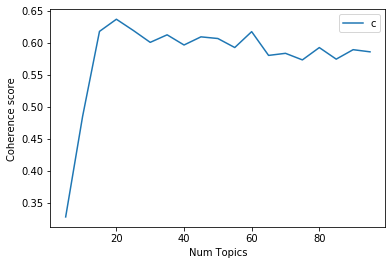

In [8]:
# Show graph
import matplotlib.pyplot as plt

limit=100; start=5; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [9]:
# Print the coherence scores
optNum = 0
maxCV = 0
for m, cv in zip(x, coherence_values):
    # maxCV = lambda cv, maxCV: cv if cv > maxCV else maxCV
    if cv > maxCV:
        optNum = m
        maxCV = cv 
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))
print("Optimal Topic Num =", optNum, " Highest Value =", maxCV)

Num Topics = 5  has Coherence Value of 0.3279
Num Topics = 10  has Coherence Value of 0.4847
Num Topics = 15  has Coherence Value of 0.6176
Num Topics = 20  has Coherence Value of 0.6366
Num Topics = 25  has Coherence Value of 0.6191
Num Topics = 30  has Coherence Value of 0.6005
Num Topics = 35  has Coherence Value of 0.6123
Num Topics = 40  has Coherence Value of 0.5964
Num Topics = 45  has Coherence Value of 0.6091
Num Topics = 50  has Coherence Value of 0.6065
Num Topics = 55  has Coherence Value of 0.5924
Num Topics = 60  has Coherence Value of 0.6172
Num Topics = 65  has Coherence Value of 0.5801
Num Topics = 70  has Coherence Value of 0.5834
Num Topics = 75  has Coherence Value of 0.5731
Num Topics = 80  has Coherence Value of 0.5923
Num Topics = 85  has Coherence Value of 0.5743
Num Topics = 90  has Coherence Value of 0.589
Num Topics = 95  has Coherence Value of 0.5857
Optimal Topic Num = 20  Highest Value = 0.6365768590647962


###  Select the model and print the topics

In [10]:
from pprint import pprint

optimal_model = model_list[5]
# model_topics = optimal_model.show_topics(formatted=False)
pprint(optimal_model.print_topics(num_words=25))

[(0,
  '0.088*"真的" + 0.069*"管線" + 0.069*"工務局" + 0.059*"最近" + 0.059*"檢視" + '
  '0.049*"箱涵" + 0.049*"老舊" + 0.039*"坑洞" + 0.029*"提到" + 0.029*"討論" + 0.020*"雨水" '
  '+ 0.020*"局長" + 0.020*"自來水" + 0.020*"武廟" + 0.020*"發現" + 0.010*"地基" + '
  '0.010*"yahoo" + 0.010*"全面性" + 0.010*"高雄市議員" + 0.010*"破洞" + 0.010*"tv" + '
  '0.010*"興盛" + 0.010*"流失" + 0.010*"魔術" + 0.010*"年紀"'),
 (2,
  '0.093*"永遠" + 0.093*"天坑" + 0.056*"生活" + 0.056*"水利局" + 0.037*"回答" + '
  '0.037*"路平" + 0.037*"民生路" + 0.037*"重點" + 0.028*"不用" + 0.028*"忠孝" + '
  '0.019*"淹水" + 0.019*"市長選舉" + 0.019*"里長" + 0.019*"後續" + 0.019*"專業" + '
  '0.019*"一月" + 0.009*"定義" + 0.009*"距離" + 0.009*"縱走" + 0.009*"一八" + 0.009*"理解" '
  '+ 0.009*"下雨" + 0.009*"憤怒感" + 0.009*"人類" + 0.009*"忠孝路"'),
 (1,
  '0.096*"管理" + 0.068*"剛剛" + 0.041*"第三" + 0.041*"通行" + 0.027*"旅費" + 0.027*"之外" '
  '+ 0.027*"座位" + 0.014*"前金" + 0.014*"交通設施" + 0.014*"長間" + 0.014*"這陣子" + '
  '0.014*"專業" + 0.014*"繩索" + 0.014*"德國" + 0.014*"現實" + 0.014*"留下" + 0.014*"下跌" '
  '+ 0.014*"眼睛" + 0.014*"推銷" + 0.01

### Finding the dominant topic in each sentence

In [11]:
import pandas as pd

# Finding the dominant topic in each sentence
def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamal, corpus=corpus, texts=list(fList))

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,0.0,0.4400,"衛武營, 工程, 國際, 文化, 文化部, 過程, 總統, 付出, 南院, 故宮","[馬英九, 昨天, 上午, 視察, 衛武營藝術文化中心, 文化部, 洪孟啟, 工程, 副主委..."
1,1,2.0,0.4818,"台灣, 日本, 協助, 熊本, 網友, 支持, 一同, 支援, 政府, 親愛","[日本, 九州熊本, 接連, 強震, 襲擊, 台灣, 捐贈, 熊本, 縣政府, 日本, 政府..."
2,2,3.0,0.5875,"企業, 動物, 團體, 認養, 壽山動物園, 保育, 相關, 目前, 增進, 符合","[壽山動物園, 增進, 動物飼養, 福祉, 保育, 工作, 設立, 高雄市壽山動物園動物認養..."
3,3,15.0,0.4857,"捐款, 熊本, 各界, 專戶, 社會, 民眾, 工作, 收據, 高市府, 震災","[日本, 熊本地震, 災情, 慘重, 高雄市, 陳菊, 昨天, 率先, 捐出, 一月, 所得..."
4,4,7.0,0.5080,"緬甸, 經濟, 農業, 投入, 青年, 通行, 世界, 小農, 好朋友, 農村","[睽違, 超過, 世紀, 緬甸, 官方, 代表, 包含, 緬甸, 聯邦, 議會, 議員, 美..."
5,5,1.0,0.2317,"高雄, 陳菊, 台灣, 競爭, 高雄市, 合作, 資源, 好評, 歷史, 尋求","[高雄, 翻轉, 政府, 力挺, 高雄市, 陳菊, 日前, 高雄市議會, 施政報告, 指出,..."
6,6,9.0,0.4712,"產業, 研發, 公司, 持續, 支持, 發展, 透過, 升級, 金屬, 經費","[高雄市, 陳菊, 前往, 東台, 精機, 參訪, 高雄, 鼓勵, 傳統, 產業, 升級, ..."
7,7,13.0,0.5077,"公車, 服務, 民眾, 措施, 優惠, 留言, 正面, 票價, 品質, 首長","[交通局, 委託, 民間, 公司, 民調, 昨天, 公布, 民調, 搭乘, 公車, 民眾, ..."
8,8,5.0,0.5459,"活動, 藝文, 明華園, 臺灣塑膠工業股份有限公司, 地方, 演出, 藝術, 公益, 吸引, 仁武","[臺灣塑膠工業股份有限公司, 企業, 回饋, 地方, 藝文, 活動, 週六, 晚間, 高雄市..."
9,9,12.0,0.4842,"陳宜民, 擔任, 服務, 研究, 立委, 中國國民黨, 成立, 分區, 出身, 地方","[中國國民黨, 分區, 立委, 陳宜民, 鳳山, 地區, 成立, 聯合, 服務處, 日前, ..."


### Find the most representative document for each topic

In [12]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()
print("------------------------------")
sent_topics_sorteddf_mallet[:10]

------------------------------


,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.4400,"衛武營, 工程, 國際, 文化, 文化部, 過程, 總統, 付出, 南院, 故宮","[馬英九, 昨天, 上午, 視察, 衛武營藝術文化中心, 文化部, 洪孟啟, 工程, 副主委..."
1,1.0,0.2317,"高雄, 陳菊, 台灣, 競爭, 高雄市, 合作, 資源, 好評, 歷史, 尋求","[高雄, 翻轉, 政府, 力挺, 高雄市, 陳菊, 日前, 高雄市議會, 施政報告, 指出,..."
2,2.0,0.4818,"台灣, 日本, 協助, 熊本, 網友, 支持, 一同, 支援, 政府, 親愛","[日本, 九州熊本, 接連, 強震, 襲擊, 台灣, 捐贈, 熊本, 縣政府, 日本, 政府..."
3,3.0,0.5875,"企業, 動物, 團體, 認養, 壽山動物園, 保育, 相關, 目前, 增進, 符合","[壽山動物園, 增進, 動物飼養, 福祉, 保育, 工作, 設立, 高雄市壽山動物園動物認養..."
4,4.0,0.3987,"永遠, 天坑, 生活, 新興, 特別, 康裕成, 民生路, 重點, 鼓勵, 回答","[路平, 太多, 不用, 這陣子, 淹水, 路平, 意見, 真的, 市政府, 路平, 用心,..."
5,5.0,0.5459,"活動, 藝文, 明華園, 臺灣塑膠工業股份有限公司, 地方, 演出, 藝術, 公益, 吸引, 仁武","[臺灣塑膠工業股份有限公司, 企業, 回饋, 地方, 藝文, 活動, 週六, 晚間, 高雄市..."
6,6.0,0.4505,"騎樓, 政府, 公共, 社區, 裡面, 政治, 告訴, 生意, 登革熱, 淨空","[第五, 騎樓, 故事, 台灣, 社區, 演變, 台灣, 早期, 透天厝, 台灣人, 吃苦,..."
7,7.0,0.5080,"緬甸, 經濟, 農業, 投入, 青年, 通行, 世界, 小農, 好朋友, 農村","[睽違, 超過, 世紀, 緬甸, 官方, 代表, 包含, 緬甸, 聯邦, 議會, 議員, 美..."
8,9.0,0.4712,"產業, 研發, 公司, 持續, 支持, 發展, 透過, 升級, 金屬, 經費","[高雄市, 陳菊, 前往, 東台, 精機, 參訪, 高雄, 鼓勵, 傳統, 產業, 升級, ..."
9,11.0,0.4111,"周玲妏, 市府, 議員, 市民, 時間, 團隊, 努力, 完成, 鼓勵, 總質詢","[特色, 公園, 持續, 努力, 目前, 期望, 工務, 團隊, 努力, 市民, 呼聲, 越..."


###  Showing topic distribution across documents

In [13]:
# Number of Documents for Each Topic
topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()

# Percentage of Documents for Each Topic
topic_contribution = round(topic_counts/topic_counts.sum(), 4)

# Topic Number and Keywords
topic_num_keywords = df_topic_sents_keywords[['Dominant_Topic', 'Topic_Keywords']]

# Concatenate Column wise
df_dominant_topics = pd.concat([topic_num_keywords, topic_counts, topic_contribution], axis=1)

# Change Column names
df_dominant_topics.columns = ['Dominant_Topic', 'Topic_Keywords', 'Num_Documents', 'Perc_Documents']

# Show
df_dominant_topics

,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0.0,0.0,"衛武營, 工程, 國際, 文化, 文化部, 過程, 總統, 付出, 南院, 故宮",1.0,0.05
1.0,2.0,"台灣, 日本, 協助, 熊本, 網友, 支持, 一同, 支援, 政府, 親愛",1.0,0.05
2.0,3.0,"企業, 動物, 團體, 認養, 壽山動物園, 保育, 相關, 目前, 增進, 符合",1.0,0.05
3.0,15.0,"捐款, 熊本, 各界, 專戶, 社會, 民眾, 工作, 收據, 高市府, 震災",1.0,0.05
4.0,7.0,"緬甸, 經濟, 農業, 投入, 青年, 通行, 世界, 小農, 好朋友, 農村",1.0,0.05
5.0,1.0,"高雄, 陳菊, 台灣, 競爭, 高雄市, 合作, 資源, 好評, 歷史, 尋求",1.0,0.05
6.0,9.0,"產業, 研發, 公司, 持續, 支持, 發展, 透過, 升級, 金屬, 經費",1.0,0.05
7.0,13.0,"公車, 服務, 民眾, 措施, 優惠, 留言, 正面, 票價, 品質, 首長",1.0,0.05
8.0,5.0,"活動, 藝文, 明華園, 臺灣塑膠工業股份有限公司, 地方, 演出, 藝術, 公益, 吸引, 仁武",NaN,NaN
9.0,12.0,"陳宜民, 擔任, 服務, 研究, 立委, 中國國民黨, 成立, 分區, 出身, 地方",1.0,0.05
